# Lab 6

github link: https://github.com/kelseyaguirre/Lab_6 

In [31]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.datasets.samples_generator import make_blobs
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

## Question 1

In [32]:
#Question 1
#read in data csv
data =  pd.read_csv('Documents/Data_Science_I/Week_13/Lab_6/NCI60_data.csv')
#read in labels csv
labels = pd.read_csv('Documents/Data_Science_I/Week_13/Lab_6/NCI60_labs.csv')
#get rid of the column with the V in the data csv
data = data.iloc[:,1:]

## Question 2

In [33]:
#Question 2
#Scale for the PCA, because it cleans it up
#initalize scaler to be standard scaler
scaler = StandardScaler()
#calculates the mean and the std dev for rows and the columns
scaler.fit(data)
#subtracts out the mean and divides by the sd
data_scaled = scaler.transform(data)

In [34]:
#Perform PCA
#initalize the PCA
pca = PCA()
#fit it to newly scaled data
pca.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [36]:
#view each variance ratio, to see how much each PCA contributes to the data 
#to then use the for the scree plot
#print the length
print(len(pca.explained_variance_ratio_))

64


There are 64 principal components.

Text(0.5, 1.0, 'Scree Plot')

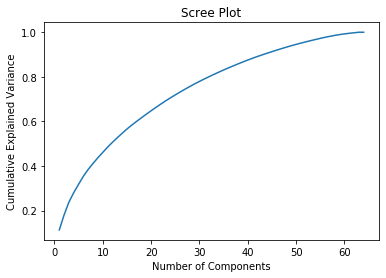

In [37]:
#scree plot
#64 principal components right now (n-1)
#arrange the components
components = np.arange(1,65)
#plot the scree plot of components vs cumulative explained variance ratio
plt.plot(components, np.cumsum(pca.explained_variance_ratio_))
#label the x axis
plt.xlabel('Number of Components')
#label the y axis
plt.ylabel('Cumulative Explained Variance')
#label the title
plt.title("Scree Plot")

Question 2: About 45 principal components are required to explain 90% of the variance of the data.

## Question 3

In [39]:
#Question 3
#transform the PCA scores of the scaled data and rename
pca_scores = pca.fit_transform(data_scaled)

Text(0.5, 1.0, 'First vs Second PC')

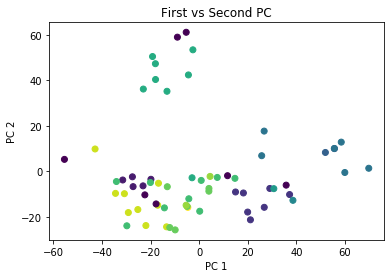

In [41]:
#initialize the label encoder
LE = LabelEncoder()
#plot a scatter plot with PCs 1 and 2 and use the label encoder for the cancer types to be colored
plt.scatter(pca_scores[:,0], pca_scores[:,1], c = LE.fit_transform(labels.iloc[:,1]))
#label the x and y axis
plt.xlabel('PC 1')
plt.ylabel('PC 2')
#add in the title
plt.title("First vs Second PC")

Text(0.5, 1.0, 'First vs Third PC')

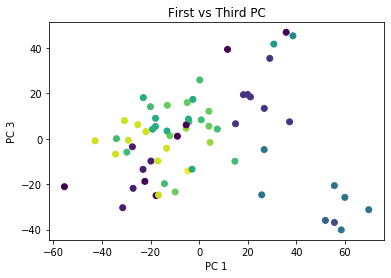

In [42]:
#initialize the label encoder
LE = LabelEncoder()
#plot a scatter plot with PCs 1 and 2 and use the label encoder for the cancer types to be colored
plt.scatter(pca_scores[:,0], pca_scores[:,2], c = LE.fit_transform(labels.iloc[:,1]))
#label the x and y axis 
plt.xlabel('PC 1')
plt.ylabel('PC 3')
#add in the title
plt.title("First vs Third PC")

Question 3: The scatterplots we got for question 3 show pretty clear divisions by colors. They're not exact, but they're clear enough to visualize the grouping for each cancer type. When comparing the first plot of PC 1 vs PC 2 there seems to be more of a divison along the y axis than in the second plot comparing PC 1 and PC 3. But for PC 1 and PC 3 the data are spread out more evenly along the y axis and x axis.

## Question 4 

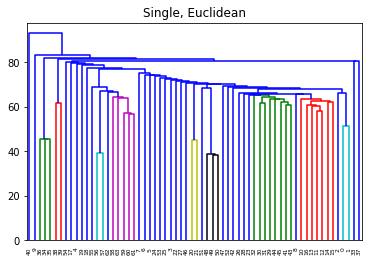

In [44]:
#Question 4
#apply hierarchical clustering, default is euclidean
#plot the first dendrogram with single linkage
dend = shc.dendrogram(shc.linkage(data, metric = 'Euclidean', method = 'single'))
#_ supresses the output
#label the title
_ = plt.title("Single, Euclidean")

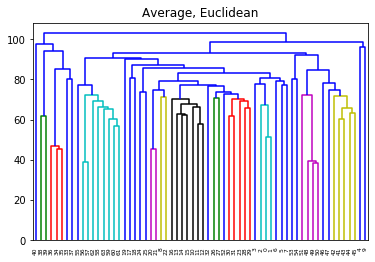

In [45]:
#apply hierarchical clustering
#plot the second dendrogram with average linkage display
dend_2 = shc.dendrogram(shc.linkage(data, metric = 'Euclidean', method = 'average'))
#_ supresses the output
#label the title
_ = plt.title("Average, Euclidean")

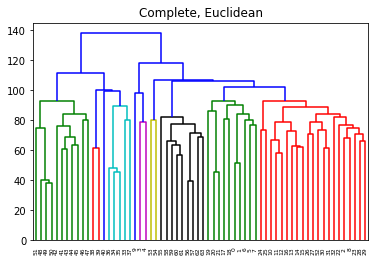

In [46]:
#apply hierarchical clustering
#plot the third dendrogram with complete linkage display
dend_3 = shc.dendrogram(shc.linkage(data, metric = 'Euclidean', method = 'complete'))
#_ supresses the output
#label the title
_ = plt.title("Complete, Euclidean")

Question 4: As expected, the results do change between each of the three types of linkage. For average and complete linkage you can see more inter-cluster dissimilarity, due to the nature of the calculations. Complete is always the most dissimilar because its displaying the largest of the pairwise dissimilarities between cancer types. Average linkage is displaying the average of the same calculation and then single linkage is displaying the smallest of these pairwise dissimilarities, which is clear with the minimal divides and shortest distances at the top of its dendrogram. From looking at the three dendrograms above, it's obvious that the last one which usees complete linkage is the best for visualizing these cancer types.

## Question 5

In [25]:
#cluster the observations into four groups
#keep using complete linkage
cluster = AgglomerativeClustering(n_clusters = 4,
                                 affinity = 'euclidean',
                                 linkage = 'complete')
#define the prediction for the crosstab
prediction = cluster.fit_predict(data)
#show the table that displays the clusters and predictions we created
#label with the cancer types from the labels csv
pd.crosstab(prediction, labels['x'])

x,BREAST,CNS,COLON,K562A-repro,K562B-repro,LEUKEMIA,MCF7A-repro,MCF7D-repro,MELANOMA,NSCLC,OVARIAN,PROSTATE,RENAL,UNKNOWN
row_0,,,,,,,,,,,,,,
0,4,5,0,0,0,0,0,0,8,8,6,2,8,1
1,0,0,0,1,1,6,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,1,0
3,2,0,7,0,0,0,1,1,0,0,0,0,0,0


Question 5: You can see from this table display that when we cluster our cancer types into four groups, our clusters are generally successful for the majority of these cancers. The one cancer type that seems to be grouped poorly here is breast cancer. Ideally, we want each cancer to have all of its different cell types to fit into one of the four clusters. The fact that breast cancer has cells type in three of the four groups shows its more diverse than the other cancer types here, and this clustering is unsuccessful for breast cancer.

## Question 6

In [47]:
#Question 6
#take the first five PC scores
firstfive = pd.DataFrame(pca_scores[:, 0:5])

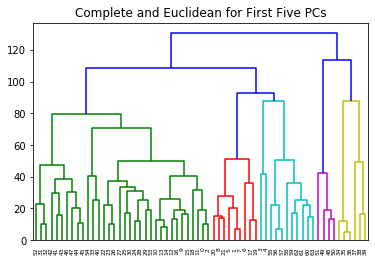

In [50]:
#plot the last dendrogram with complete linkage display for just the first five PCs
dend_4 = shc.dendrogram(shc.linkage(firstfive, metric = 'Euclidean', method = 'complete'))
_ = plt.title("Complete and Euclidean for First Five PCs")

Question 6: This dendrogram displays the just first five PCs calculated and it is a lot cleaner to view at than viewing all 64 PCs we got originally. With complete linkage, limiting the results and then grouping by cancer types here, we now have a clean and easy to interpret result. This diagram shows that from our data, viewing just a small subset of the principal components we produced is enough to see clean clustering between each cancer type.